In [0]:
project_id = 'stalwart-coast-258901'

In [0]:
import uuid
bucket_name = 'colab-sample-bucket-' + str(uuid.uuid1())

In [0]:
from google.colab import auth
auth.authenticate_user()

In [4]:
!gcloud config set project {project_id}

Updated property [core/project].


In [5]:
!gsutil cp gs://cleaned_dataset_msba/data_for_aggregation.csv /tmp/data_for_aggregation.csv


Copying gs://cleaned_dataset_msba/data_for_aggregation.csv...
| [1 files][229.7 MiB/229.7 MiB]                                                
Operation completed over 1 objects/229.7 MiB.                                    


## Import Libraries 


In [0]:
import pandas as pd
import numpy as np

## Read Data File

In [0]:
# Read in the aggregated training data
df = pd.read_csv("/tmp/data_for_aggregation.csv", dtype={'fullVisitorId':'str'})

In [8]:
# View the data structure
df.describe()

,Unnamed: 0,visitNumber,visitStartTime,pageviews,timeOnSite,totalTransactionRevenue,transactions,hitNumber2,hour2,timeDifference
count,1.706883e+06,1.706883e+06,1.706883e+06,1.706883e+06,1.706883e+06,1.706883e+06,1.706883e+06,1.706883e+06,1.706883e+06,1.706883e+06
mean,8.540468e+05,2.335028e+00,1.498338e+09,3.695900e+00,1.238879e+02,1.549086e+06,1.132474e-02,4.442414e+00,5.827631e+00,1.240594e+02
std,4.931444e+05,9.356654e+00,1.624378e+07,6.474520e+00,3.545393e+02,6.884026e+07,1.155123e-01,9.025989e+00,7.314823e+00,3.715709e+02
min,0.000000e+00,1.000000e+00,1.470035e+09,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,4.269755e+05,1.000000e+00,1.482721e+09,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,8.540180e+05,1.000000e+00,1.499812e+09,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,1.281212e+06,1.000000e+00,1.512498e+09,4.000000e+00,7.600000e+01,0.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,6.000000e+01
max,1.708336e+06,4.570000e+02,1.525158e+09,5.000000e+02,1.901700e+04,4.708206e+10,2.500000e+01,5.000000e+02,2.300000e+01,8.292000e+04


In [0]:
temp = df.copy()

In [10]:
temp['subContinent'].isna().sum()

2514

In [0]:
#temp[]

In [0]:
temp['subContinent'] = temp['subContinent'].fillna(0)

In [13]:
temp['subContinent'].isna().sum()

0

In [14]:
temp.head()

,Unnamed: 0,channelGrouping,date,fullVisitorId,visitNumber,visitStartTime,browser,deviceCategory,operatingSystem,subContinent,pageviews,timeOnSite,totalTransactionRevenue,transactions,medium,source,hitNumber2,hour2,timeDifference
0,0,Organic Search,2017-10-16,3162355547410993243,1,1508198450,Firefox,desktop,Windows,Western Europe,1.0,0.0,0.0,0.0,organic,google,1,0,0.0
1,1,Referral,2017-10-16,8934116514970143966,6,1508176307,Chrome,desktop,Others,Northern America,2.0,28.0,0.0,0.0,referral,Others,2,10,60.0
2,2,Direct,2017-10-16,7992466427990357681,1,1508201613,Chrome,mobile,Android,Northern America,2.0,38.0,0.0,0.0,NaN,(direct),2,17,60.0
3,3,Organic Search,2017-10-16,9075655783635761930,1,1508169851,Chrome,desktop,Windows,Western Asia,2.0,1.0,0.0,0.0,organic,google,2,9,0.0
4,4,Organic Search,2017-10-16,6960673291025684308,1,1508190552,Chrome,desktop,Windows,Central America,2.0,52.0,0.0,0.0,organic,google,2,14,60.0


In [15]:
temp['timeDifference'].value_counts().sort_index()

0.0        1064211
60.0        245708
120.0       104676
180.0        59203
240.0        39351
            ...   
15000.0          1
15060.0          1
19020.0          1
82860.0          2
82920.0          1
Name: timeDifference, Length: 177, dtype: int64

In [16]:
df.head()

,Unnamed: 0,channelGrouping,date,fullVisitorId,visitNumber,visitStartTime,browser,deviceCategory,operatingSystem,subContinent,pageviews,timeOnSite,totalTransactionRevenue,transactions,medium,source,hitNumber2,hour2,timeDifference
0,0,Organic Search,2017-10-16,3162355547410993243,1,1508198450,Firefox,desktop,Windows,Western Europe,1.0,0.0,0.0,0.0,organic,google,1,0,0.0
1,1,Referral,2017-10-16,8934116514970143966,6,1508176307,Chrome,desktop,Others,Northern America,2.0,28.0,0.0,0.0,referral,Others,2,10,60.0
2,2,Direct,2017-10-16,7992466427990357681,1,1508201613,Chrome,mobile,Android,Northern America,2.0,38.0,0.0,0.0,NaN,(direct),2,17,60.0
3,3,Organic Search,2017-10-16,9075655783635761930,1,1508169851,Chrome,desktop,Windows,Western Asia,2.0,1.0,0.0,0.0,organic,google,2,9,0.0
4,4,Organic Search,2017-10-16,6960673291025684308,1,1508190552,Chrome,desktop,Windows,Central America,2.0,52.0,0.0,0.0,organic,google,2,14,60.0


In [0]:
#### Step 3: Transform the data
# Remove NA values for the data
#df = df[~(((df['timeDifference'].isna())) | ((df['pageviews'].isna())))]

# df['timeDifference'] = df['timeDifference'].fillna(0)

# df= df[~(df['subContinent'].isna()|df['medium'].isna())]

# Remove unnecessary columns
df= df.drop(columns=["Unnamed: 0"] )

# Transform date fields to proper dates
df['date']  = pd.to_datetime(df['date'] , format='%Y-%m-%d')

In [0]:
temp['subContinent'] = temp['subContinent'].fillna(0)
temp['medium'] = temp['medium'].fillna(0)

In [0]:
# One-hot-encode the categorical fields
ohe_df = pd.get_dummies(df, columns = ['browser','channelGrouping', 'deviceCategory','medium','operatingSystem','source','subContinent' ])

In [20]:
type(ohe_df['fullVisitorId'][0])

str

In [21]:
df.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'visitNumber',
       'visitStartTime', 'browser', 'deviceCategory', 'operatingSystem',
       'subContinent', 'pageviews', 'timeOnSite', 'totalTransactionRevenue',
       'transactions', 'medium', 'source', 'hitNumber2', 'hour2',
       'timeDifference'],
      dtype='object')

In [22]:
# list available fields
ohe_df.columns

Index(['date', 'fullVisitorId', 'visitNumber', 'visitStartTime', 'pageviews',
       'timeOnSite', 'totalTransactionRevenue', 'transactions', 'hitNumber2',
       'hour2', 'timeDifference', 'browser_Android Webview', 'browser_Chrome',
       'browser_Edge', 'browser_Firefox', 'browser_Internet Explorer',
       'browser_Others', 'browser_Safari', 'channelGrouping_(Other)',
       'channelGrouping_Affiliates', 'channelGrouping_Direct',
       'channelGrouping_Display', 'channelGrouping_Organic Search',
       'channelGrouping_Paid Search', 'channelGrouping_Referral',
       'channelGrouping_Social', 'deviceCategory_desktop',
       'deviceCategory_mobile', 'deviceCategory_tablet', 'medium_affiliate',
       'medium_cpc', 'medium_cpm', 'medium_organic', 'medium_referral',
       'operatingSystem_Android', 'operatingSystem_Macintosh',
       'operatingSystem_Others', 'operatingSystem_Windows',
       'operatingSystem_iOS', 'source_(direct)', 'source_Others',
       'source_google', 'sourc

In [0]:
#ohe_df['fullVisitorId'] = 'T'+ ohe_df['fullVisitorId'].astype(str)

In [0]:
#ohe_df['fullVisitorId']

In [0]:
# aggregate the data by customer level
train_df = ohe_df.groupby('fullVisitorId').agg({
  'timeDifference':'mean',
  'hitNumber2' :'mean',
  'hour2':'mean',
  'visitNumber':'mean',
  'pageviews':'mean',
  'timeOnSite':'mean',
'transactions':'sum',
'totalTransactionRevenue':'sum',
 'browser_Android Webview':"sum",
 'browser_Chrome':"sum",
 'browser_Edge':"sum",
 'browser_Firefox':"sum",
 'browser_Internet Explorer':"sum",
 'browser_Others':"sum",
 'browser_Safari':"sum",
 'channelGrouping_Affiliates':"sum",
 'channelGrouping_Display':"sum",
 'channelGrouping_Organic Search':"sum",
 'channelGrouping_Paid Search':"sum",
 'channelGrouping_Referral':"sum",
 'channelGrouping_Social':"sum",
 'deviceCategory_desktop':"sum",
 'deviceCategory_mobile':"sum",
 'deviceCategory_tablet':"sum",
 'medium_affiliate':"sum",
 'medium_cpc':"sum",
 'medium_cpm':"sum",
 'medium_organic':"sum",
 'medium_referral':"sum",
 'operatingSystem_Android':"sum",
 'operatingSystem_Macintosh':"sum",
 'operatingSystem_Others':"sum",
 'operatingSystem_Windows':"sum",
 'operatingSystem_iOS':"sum",
 'source_(direct)':"sum",
 'source_Others':"sum",
 'source_google':"sum",
 'source_youtube.com':"sum",
 'subContinent_Australasia':"sum",
 'subContinent_Caribbean':"sum",
 'subContinent_Central America':"sum",
 'subContinent_Central Asia':"sum",
 'subContinent_Eastern Africa':"sum",
 'subContinent_Eastern Asia':"sum",
 'subContinent_Eastern Europe':"sum",
 'subContinent_Melanesia':"sum",
 'subContinent_Micronesian Region':"sum",
 'subContinent_Middle Africa':"sum",
 'subContinent_Northern Africa':"sum",
 'subContinent_Northern America':"sum",
 'subContinent_Northern Europe':"sum",
 'subContinent_Polynesia':"sum",
 'subContinent_South America':"sum",
 'subContinent_Southeast Asia':"sum",
 'subContinent_Southern Africa':"sum",
 'subContinent_Southern Asia':"sum",
 'subContinent_Southern Europe':"sum",
 'subContinent_Western Africa':"sum",
 'subContinent_Western Asia':"sum",
 'subContinent_Western Europe':"sum"
}).reset_index()

In [26]:
train_df.columns.size

61

In [27]:
# Show the aggregated data
train_df.head()

,fullVisitorId,timeDifference,hitNumber2,hour2,visitNumber,pageviews,timeOnSite,transactions,totalTransactionRevenue,browser_Android Webview,browser_Chrome,browser_Edge,browser_Firefox,browser_Internet Explorer,browser_Others,browser_Safari,channelGrouping_Affiliates,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,deviceCategory_desktop,deviceCategory_mobile,deviceCategory_tablet,medium_affiliate,medium_cpc,medium_cpm,medium_organic,medium_referral,operatingSystem_Android,operatingSystem_Macintosh,operatingSystem_Others,operatingSystem_Windows,operatingSystem_iOS,source_(direct),source_Others,source_google,source_youtube.com,subContinent_Australasia,subContinent_Caribbean,subContinent_Central America,subContinent_Central Asia,subContinent_Eastern Africa,subContinent_Eastern Asia,subContinent_Eastern Europe,subContinent_Melanesia,subContinent_Micronesian Region,subContinent_Middle Africa,subContinent_Northern Africa,subContinent_Northern America,subContinent_Northern Europe,subContinent_Polynesia,subContinent_South America,subContinent_Southeast Asia,subContinent_Southern Africa,subContinent_Southern Asia,subContinent_Southern Europe,subContinent_Western Africa,subContinent_Western Asia,subContinent_Western Europe
0,0000053049821714864,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,1,0,1,0,0,0,0,0,0.0,1,0,1,0,0,0,0,0,0.0,0,0.0,1,0.0,1,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,1,0,0,0,0.0,0,0,0
1,0000085840370633780,60.0,2.0,18.0,1.0,2.0,13.0,0.0,0.0,0,0.0,0,0.0,0.0,0,1,0,0,1,0,0,0,1.0,0,0,0,0,0,1,0,0,1.0,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0.0,0,0,0,0,0,1.0,0,0,0,0,0,0,0.0,0,0,0
2,0000166374699289385,0.0,5.0,9.0,1.0,5.0,41.0,0.0,0.0,0,1.0,0,0.0,0.0,0,0,0,0,1,0,0,0,1.0,0,0,0,0,0,1,0,0,1.0,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0.0,0,0,0,0,0,1.0,0,0,0,0,0,0,0.0,0,0,0
3,0000197671390269035,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1,0.0,0,0.0,0.0,0,0,0,0,0,0,0,1,0.0,1,0,0,0,0,0,1,1,0.0,0,0.0,0,0.0,1,0,0,0,0,0,0,0,0.0,0,0,0,0,0,1.0,0,0,0,0,0,0,0.0,0,0,0
4,000020731284570628,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,1.0,0,0.0,0.0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0.0,0,1.0,0,1.0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0,0,1


In [28]:
# Create a test dataframe
!gsutil cp gs://cleaned_dataset_msba/data_for_aggregation_test.csv /tmp/data_for_aggregation_test.csv
df_test = pd.read_csv("/tmp/data_for_aggregation_test.csv", dtype={'fullVisitorId':'str'})

Copying gs://cleaned_dataset_msba/data_for_aggregation_test.csv...
- [1 files][ 53.5 MiB/ 53.5 MiB]                                                
Operation completed over 1 objects/53.5 MiB.                                     


In [29]:
df_test.shape

(401589, 20)

In [0]:
# df_test = df_test[~(((df_test['timeDifference'].isna())) | ((df_test['pageviews'].isna())))]

df_test['timeDifference'] = np.where(df_test.timeDifference.isna(), 0.0, df_test.timeDifference)
df_test['pageviews'] = np.where(df_test.pageviews.isna(), 0.0, df_test.pageviews)
df_test['subContinent'] = np.where(df_test.subContinent.isna(), 0.0, df_test.subContinent)
df_test['medium'] = np.where(df_test.medium.isna(), 0.0, df_test.medium)


#df_test= df_test[~(df_test['subContinent'].isna()|df_test['medium'].isna())]
df_test= df_test.drop(columns=["Unnamed: 0"] )
df_test= df_test.drop(columns=["value"] )

In [31]:
df_test.head()

,channelGrouping,date,fullVisitorId,visitNumber,visitStartTime,browser,deviceCategory,operatingSystem,subContinent,pageviews,timeOnSite,totalTransactionRevenue,transactions,medium,source,hitNumber2,hour2,timeDifference
0,Organic Search,20180511,7460955084541987166,2,1526099341,Chrome,mobile,Android,Southern Asia,3.0,973.0,0.0,0.0,organic,google,4,21,960.0
1,Direct,20180511,460252456180441002,166,1526064483,Chrome,desktop,Macintosh,Northern America,3.0,49.0,0.0,0.0,0,(direct),4,11,0.0
2,Organic Search,20180511,3461808543879602873,2,1526067157,Chrome,desktop,Others,Northern America,3.0,24.0,0.0,0.0,organic,google,4,12,60.0
3,Direct,20180511,975129477712150630,4,1526107551,Chrome,mobile,iOS,Northern America,4.0,25.0,0.0,0.0,0,(direct),5,23,60.0
4,Organic Search,20180511,8381672768065729990,1,1526060254,Internet Explorer,tablet,Windows,Northern America,4.0,49.0,0.0,0.0,organic,google,5,10,60.0


In [0]:
df_test['date']  = pd.to_datetime(df_test['date'] , format='%Y-%m-%d')
ohe_df_test = pd.get_dummies(df_test, columns = ['browser','channelGrouping', 'deviceCategory','medium','operatingSystem','source','subContinent' ])

In [33]:
ohe_df_test.shape

(401589, 67)

In [0]:

test_df = ohe_df_test.groupby('fullVisitorId').agg({
  'timeDifference':'mean',
  'hitNumber2' :'mean',
  'hour2':'mean',
  'visitNumber':'mean',
  'pageviews':'mean',
  'timeOnSite':'mean',
  'transactions':'sum',
'totalTransactionRevenue':'sum',
 'browser_Android Webview':"sum",
 'browser_Chrome':"sum",
 'browser_Edge':"sum",
 'browser_Firefox':"sum",
 'browser_Internet Explorer':"sum",
 'browser_Others':"sum",
 'browser_Safari':"sum",
 'channelGrouping_Affiliates':"sum",
 'channelGrouping_Display':"sum",
 'channelGrouping_Organic Search':"sum",
 'channelGrouping_Paid Search':"sum",
 'channelGrouping_Referral':"sum",
 'channelGrouping_Social':"sum",
 'deviceCategory_desktop':"sum",
 'deviceCategory_mobile':"sum",
 'deviceCategory_tablet':"sum",
 'medium_affiliate':"sum",
 'medium_cpc':"sum",
 'medium_cpm':"sum",
 'medium_organic':"sum",
 'medium_referral':"sum",
 'operatingSystem_Android':"sum",
 'operatingSystem_Macintosh':"sum",
 'operatingSystem_Others':"sum",
 'operatingSystem_Windows':"sum",
 'operatingSystem_iOS':"sum",
 'source_(direct)':"sum",
 'source_Others':"sum",
 'source_google':"sum",
 'source_youtube.com':"sum",
 'subContinent_Australasia':"sum",
 'subContinent_Caribbean':"sum",
 'subContinent_Central America':"sum",
 'subContinent_Central Asia':"sum",
 'subContinent_Eastern Africa':"sum",
 'subContinent_Eastern Asia':"sum",
 'subContinent_Eastern Europe':"sum",
 'subContinent_Melanesia':"sum",
 'subContinent_Micronesian Region':"sum",
 'subContinent_Middle Africa':"sum",
 'subContinent_Northern Africa':"sum",
 'subContinent_Northern America':"sum",
 'subContinent_Northern Europe':"sum",
 'subContinent_Polynesia':"sum",
 'subContinent_South America':"sum",
 'subContinent_Southeast Asia':"sum",
 'subContinent_Southern Africa':"sum",
 'subContinent_Southern Asia':"sum",
 'subContinent_Southern Europe':"sum",
 'subContinent_Western Africa':"sum",
 'subContinent_Western Asia':"sum",
 'subContinent_Western Europe':"sum"
}).reset_index()

In [35]:
test_df.shape

(296723, 61)

In [36]:
test_df.head()

,fullVisitorId,timeDifference,hitNumber2,hour2,visitNumber,pageviews,timeOnSite,transactions,totalTransactionRevenue,browser_Android Webview,browser_Chrome,browser_Edge,browser_Firefox,browser_Internet Explorer,browser_Others,browser_Safari,channelGrouping_Affiliates,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,deviceCategory_desktop,deviceCategory_mobile,deviceCategory_tablet,medium_affiliate,medium_cpc,medium_cpm,medium_organic,medium_referral,operatingSystem_Android,operatingSystem_Macintosh,operatingSystem_Others,operatingSystem_Windows,operatingSystem_iOS,source_(direct),source_Others,source_google,source_youtube.com,subContinent_Australasia,subContinent_Caribbean,subContinent_Central America,subContinent_Central Asia,subContinent_Eastern Africa,subContinent_Eastern Asia,subContinent_Eastern Europe,subContinent_Melanesia,subContinent_Micronesian Region,subContinent_Middle Africa,subContinent_Northern Africa,subContinent_Northern America,subContinent_Northern Europe,subContinent_Polynesia,subContinent_South America,subContinent_Southeast Asia,subContinent_Southern Africa,subContinent_Southern Asia,subContinent_Southern Europe,subContinent_Western Africa,subContinent_Western Asia,subContinent_Western Europe
0,0000196310838896290,840.0,13.0,7.0,2.0,10.0,887.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0000268499301061358,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0000900085223565423,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,000101445922736554,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0001180870711546826,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [0]:
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [38]:
train_df.columns

Index(['fullVisitorId', 'timeDifference', 'hitNumber2', 'hour2', 'visitNumber',
       'pageviews', 'timeOnSite', 'transactions', 'totalTransactionRevenue',
       'browser_Android Webview', 'browser_Chrome', 'browser_Edge',
       'browser_Firefox', 'browser_Internet Explorer', 'browser_Others',
       'browser_Safari', 'channelGrouping_Affiliates',
       'channelGrouping_Display', 'channelGrouping_Organic Search',
       'channelGrouping_Paid Search', 'channelGrouping_Referral',
       'channelGrouping_Social', 'deviceCategory_desktop',
       'deviceCategory_mobile', 'deviceCategory_tablet', 'medium_affiliate',
       'medium_cpc', 'medium_cpm', 'medium_organic', 'medium_referral',
       'operatingSystem_Android', 'operatingSystem_Macintosh',
       'operatingSystem_Others', 'operatingSystem_Windows',
       'operatingSystem_iOS', 'source_(direct)', 'source_Others',
       'source_google', 'source_youtube.com', 'subContinent_Australasia',
       'subContinent_Caribbean', 'subConti

In [0]:
# mention the features of interest
features = [ 'timeDifference', 'hitNumber2', 'hour2', 'visitNumber',
       'pageviews', 'timeOnSite', 'browser_Android Webview', 'browser_Chrome', 'browser_Edge',
       'browser_Firefox', 'browser_Internet Explorer', 'browser_Others',
       'browser_Safari', 'channelGrouping_Affiliates',
       'channelGrouping_Display', 'channelGrouping_Organic Search',
       'channelGrouping_Paid Search', 'channelGrouping_Referral',
       'channelGrouping_Social', 'deviceCategory_desktop',
       'deviceCategory_mobile', 'deviceCategory_tablet', 'medium_affiliate',
       'medium_cpc', 'medium_cpm', 'medium_organic', 'medium_referral',
       'operatingSystem_Android', 'operatingSystem_Macintosh',
       'operatingSystem_Others', 'operatingSystem_Windows',
       'operatingSystem_iOS', 'source_(direct)', 'source_Others',
       'source_google', 'source_youtube.com', 'subContinent_Australasia',
       'subContinent_Caribbean', 'subContinent_Central America',
       'subContinent_Central Asia', 'subContinent_Eastern Africa',
       'subContinent_Eastern Asia', 'subContinent_Eastern Europe',
       'subContinent_Melanesia', 'subContinent_Micronesian Region',
       'subContinent_Middle Africa', 'subContinent_Northern Africa',
       'subContinent_Northern America', 'subContinent_Northern Europe',
       'subContinent_Polynesia', 'subContinent_South America',
       'subContinent_Southeast Asia', 'subContinent_Southern Africa',
       'subContinent_Southern Asia', 'subContinent_Southern Europe',
       'subContinent_Western Africa', 'subContinent_Western Asia',
       'subContinent_Western Europe']

### Classification Model (y_clf=1 if there is transaction, y_clf=0 if no transactions made)


In [0]:
#classifier
X_clf = train_df[features]
y_clf = np.where(train_df["totalTransactionRevenue"]==0, 0, 1)

#train and validation split for classifier
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, test_size=0.25, random_state=42)

## Upsampling

In [0]:
#upsampling code
from sklearn.utils import resample
train_df_clf = train_df.copy()
train_df_clf['totalTransactionRevenue'] = np.where(train_df_clf["totalTransactionRevenue"]==0, 0, 1)
majority = train_df_clf[train_df_clf.totalTransactionRevenue == 0] # Did not make a transaction
minority = train_df_clf[train_df_clf.totalTransactionRevenue == 1] # Did make a transaction

minority_upsampled = resample(minority, replace=True,
                              n_samples = int(len(majority)*.5//1) , random_state=123) # get a 2 to 1 ratio of no transactions to transactions

train_df_clf = pd.concat([majority, minority_upsampled])

In [0]:
X_clf = train_df_clf[features]
y_clf = train_df_clf["totalTransactionRevenue"]
# y_clf = np.where(train_df["totalTransactionRevenue"]==0, 0, 1)
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, test_size=0.25, random_state=42)

## Using Random Search for Classification

In [0]:
#mention the parameters for classifier
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
# param_test ={'num_leaves': sp_randint(6, 50), 
#              'min_child_samples': sp_randint(100, 500), 
#              'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
#              'subsample': sp_uniform(loc=0.2, scale=0.8), 
#              'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
#              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
#              'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}
param_clf = {"objective" : "binary",
              "max_bin" : 256,
              "learning_rate" : 0.005,
              "bagging_fraction" : 0.9,
              "feature_fraction" : 0.8,
              "min_data" : 1,
              "bagging_freq" : 1,
              "metric" : "binary_logloss"}
param_clf_search = {"num_leaves" : sp_randint(10, 30)}

In [0]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
model_lgb = lgb.LGBMClassifier(
              objective = "binary",
              max_bin = 256,
              learning_rate = 0.005,
              bagging_fraction = 0.9,
              feature_fraction = 0.8,
              min_data = 1,
              bagging_freq = 1,
              metric = "binary_logloss")
params_test1 = {"num_leaves" : range(30, 55, 5)}
gsearch1 = RandomizedSearchCV(estimator=model_lgb, param_distributions=params_test1, 
                        scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)

In [45]:
gsearch1.fit(X_clf_train, y_clf_train)
gsearch1.best_params_, gsearch1.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  9.0min finished


({'num_leaves': 50}, 0.9891197779957384)

## Using Random Search for Regression

In [0]:
#mention the parameters for classifier
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
# param_test ={'num_leaves': sp_randint(6, 50), 
#              'min_child_samples': sp_randint(100, 500), 
#              'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
#              'subsample': sp_uniform(loc=0.2, scale=0.8), 
#              'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
#              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
#              'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}
param_clf = {"objective" : "binary",
              "max_bin" : 256,
              "learning_rate" : 0.005,
              "bagging_fraction" : 0.9,
              "feature_fraction" : 0.8,
              "min_data" : 1,
              "bagging_freq" : 1,
              "metric" : "binary_logloss"}
param_clf_search = {"num_leaves" : sp_randint(10, 30)}

In [0]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
  # param_reg = {"objective" : "regression",
  #             "max_bin" : 256,
  #             "learning_rate" : 0.01,
  #             "num_leaves" : 9,
  #             "bagging_fraction" : 0.9,
  #             "feature_fraction" : 0.8,
  #             "min_data" : 1,
  #             "bagging_freq" : 1,
  #             "metric" : "rmse",
  #             "bagging_seed": 13+i,
  #             "feature_fraction_seed": 42+i}

model_lgb = lgb.LGBMRegressor(
              objective = "regression",
              max_bin = 256,
              learning_rate = 0.005,
              bagging_fraction = 0.9,
              feature_fraction = 0.8,
              min_data = 1,
              bagging_freq = 1,
              metric = "rmse")
params_test2 = {"num_leaves" : range(5, 30, 5)}
gsearch2 = RandomizedSearchCV(estimator=model_lgb, param_distributions=params_test2, 
                        scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

In [48]:
gsearch2.fit(X_clf_train, y_clf_train)
gsearch2.best_params_, gsearch2.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  5.6min finished


({'num_leaves': 25}, -0.1038077818116484)

## Plotting the Validation Curve

In [97]:
from sklearn.model_selection import validation_curve
num_leaves = range(20, 60, 5)
train_scores, test_scores = validation_curve(
lgb.LGBMRegressor(), X_clf_train, y_clf_train, param_name="num_leaves", cv=10,
param_range=num_leaves,
scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure(figsize=(10,6))
plt.title("Validation Curve with LightGBM")
plt.xlabel("num_leaves")
# plt.ylabel("F-Score")
# plt.ylim(0.4, 1.1)
# Plot the values for recall with K ranging from 1-20
plt.plot(num_leaves, train_scores_mean, label="Training score",
color="r")
#plt.fill_between(neighbor, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="b")
plt.plot(num_leaves, test_scores_mean, label="Cross-validation score",
color="g")
#plt.fill_between(neighbor, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="r")
plt.legend(loc="best")
plt.xticks(num_leaves)
plt.show()

ValueError: ignored

In [50]:
lgtrain = lgb.Dataset(X_clf_train, label=y_clf_train)
lgval = lgb.Dataset(X_clf_test, label=y_clf_test)
model_clf = lgb.train(param_clf, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.369766
[200]	valid_0's binary_logloss: 0.249188
[300]	valid_0's binary_logloss: 0.186253
[400]	valid_0's binary_logloss: 0.151282
[500]	valid_0's binary_logloss: 0.131213
[600]	valid_0's binary_logloss: 0.119227
[700]	valid_0's binary_logloss: 0.111833
[800]	valid_0's binary_logloss: 0.107133
[900]	valid_0's binary_logloss: 0.10399
[1000]	valid_0's binary_logloss: 0.101774
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_logloss: 0.101774


Regression Model (y is the transaction amount if there is a transaction)

In [0]:

# Regressor
# keep only those records that have a transaction value
train_df_reg = train_df[train_df["totalTransactionRevenue"]!=0]
X_reg = train_df_reg[features]
y_reg = np.log1p(train_df_reg["totalTransactionRevenue"].values)

#train and validation split for regressor
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.25, random_state=42)

In [0]:
params_reg = {"objective" : "regression",
              "metric" : "rmse", 
              "num_leaves" : 30,
              "maxdepth" : 8,
              "min_child_samples" : 50,
              "learning_rate" : 0.03,
              "bagging_fraction" : 0.75,
              "feature_fraction" : 0.45,
              "bagging_frequency" : 5,
              "bagging_seed" : 2018,
              "verbosity" : -1}

In [53]:
lgtrain = lgb.Dataset(X_reg_train, label=y_reg_train)
lgval = lgb.Dataset(X_reg_test, label=y_reg_test)
model_reg = lgb.train(params_reg, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 0.967361
[200]	valid_0's rmse: 0.96354
[300]	valid_0's rmse: 0.962753
Early stopping, best iteration is:
[269]	valid_0's rmse: 0.962266


In [54]:
train_df

,fullVisitorId,timeDifference,hitNumber2,hour2,visitNumber,pageviews,timeOnSite,transactions,totalTransactionRevenue,browser_Android Webview,browser_Chrome,browser_Edge,browser_Firefox,browser_Internet Explorer,browser_Others,browser_Safari,channelGrouping_Affiliates,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,deviceCategory_desktop,deviceCategory_mobile,deviceCategory_tablet,medium_affiliate,medium_cpc,medium_cpm,medium_organic,medium_referral,operatingSystem_Android,operatingSystem_Macintosh,operatingSystem_Others,operatingSystem_Windows,operatingSystem_iOS,source_(direct),source_Others,source_google,source_youtube.com,subContinent_Australasia,subContinent_Caribbean,subContinent_Central America,subContinent_Central Asia,subContinent_Eastern Africa,subContinent_Eastern Asia,subContinent_Eastern Europe,subContinent_Melanesia,subContinent_Micronesian Region,subContinent_Middle Africa,subContinent_Northern Africa,subContinent_Northern America,subContinent_Northern Europe,subContinent_Polynesia,subContinent_South America,subContinent_Southeast Asia,subContinent_Southern Africa,subContinent_Southern Asia,subContinent_Southern Europe,subContinent_Western Africa,subContinent_Western Asia,subContinent_Western Europe
0,0000053049821714864,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,1,0,1,0,0,0,0,0,0.0,1,0,1,0,0,0,0,0,0.0,0,0.0,1,0.0,1,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,1,0,0,0,0.0,0,0,0
1,0000085840370633780,60.0,2.0,18.0,1.0,2.0,13.0,0.0,0.0,0,0.0,0,0.0,0.0,0,1,0,0,1,0,0,0,1.0,0,0,0,0,0,1,0,0,1.0,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0.0,0,0,0,0,0,1.0,0,0,0,0,0,0,0.0,0,0,0
2,0000166374699289385,0.0,5.0,9.0,1.0,5.0,41.0,0.0,0.0,0,1.0,0,0.0,0.0,0,0,0,0,1,0,0,0,1.0,0,0,0,0,0,1,0,0,1.0,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0.0,0,0,0,0,0,1.0,0,0,0,0,0,0,0.0,0,0,0
3,0000197671390269035,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1,0.0,0,0.0,0.0,0,0,0,0,0,0,0,1,0.0,1,0,0,0,0,0,1,1,0.0,0,0.0,0,0.0,1,0,0,0,0,0,0,0,0.0,0,0,0,0,0,1.0,0,0,0,0,0,0,0.0,0,0,0
4,000020731284570628,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,1.0,0,0.0,0.0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0.0,0,1.0,0,1.0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325844,9999978264901065827,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,1.0,0,0.0,0.0,0,0,0,0,1,0,0,0,1.0,0,0,0,0,0,0,0,0,0.0,0,1.0,0,1.0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,1.0,0,0,0,0,0,0,0.0,0,0,0
1325845,9999985820452794361,210.0,5.5,14.0,1.5,5.5,190.0,0.0,0.0,0,2.0,0,0.0,0.0,0,0,0,0,1,1,0,0,2.0,0,0,0,1,0,1,0,0,0.0,0,2.0,0,0.0,0,2,0,0,0,0,0,0,0.0,0,0,0,0,0,2.0,0,0,0,0,0,0,0.0,0,0,0
1325846,9999986437109498564,60.0,2.0,16.0,1.0,2.0,55.0,0.0,0.0,0,1.0,0,0.0,0.0,0,0,0,0,1,0,0,0,0.0,1,0,0,0,0,1,0,1,0.0,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,1.0,0,0,0
1325847,99999951882718968,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,1.0,0,0.0,0.0,0,0,0,0,0,0,0,1,1.0,0,0,0,0,0,0,1,0,0.0,0,1.0,0,0.0,0,0,1,0,0,1,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0,0,0


In [0]:
lgtrain_clf = lgb.Dataset(X_clf_train, label=y_clf_train)
lgval_clf = lgb.Dataset(X_clf_test, label=y_clf_test)
# model_clf = lgb.train(param_clf, lgtrain_clf, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)

lgtrain_reg = lgb.Dataset(X_reg_train, label=y_reg_train)
lgval_reg = lgb.Dataset(X_reg_test, label=y_reg_test)
# model_reg = lgb.train(params_reg, lgtrain_reg, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)

X_test = test_df[features]

In [56]:
## need test data to run

pr_lgb_sum = 0
for i in range(10):
  print("Iteration number ", i)
  param_clf = {"objective" : "binary",
              "max_bin" : 256,
              "learning_rate" : 0.01,
              "num_leaves" : 50,
              "bagging_fraction" : 0.9,
              "feature_fraction" : 0.8,
              "min_data" : 1,
              "bagging_freq" : 1,
              "metric" : "binary_logloss",
              "bagging_seed": 13+i,
              "feature_fraction_seed": 42+i}
  param_reg = {"objective" : "regression",
              "max_bin" : 256,
              "learning_rate" : 0.01,
              "num_leaves" : 30,
              "bagging_fraction" : 0.9,
              "feature_fraction" : 0.8,
              "min_data" : 1,
              "bagging_freq" : 1,
              "metric" : "rmse",
              "bagging_seed": 13+i,
              "feature_fraction_seed": 42+i}
  model_clf = lgb.train(param_clf, lgtrain_clf)
  pr_clf = model_clf.predict(X_test, num_iteration=model_clf.best_iteration)
  model_reg = lgb.train(param_reg, lgtrain_reg)
  pr_reg = model_reg.predict(X_test, num_iteration=model_reg.best_iteration)
  pr_lgb_sum = pr_lgb_sum + pr_reg*pr_clf

pr_final = pr_lgb_sum/10

Iteration number  0
Iteration number  1
Iteration number  2
Iteration number  3
Iteration number  4
Iteration number  5
Iteration number  6
Iteration number  7
Iteration number  8
Iteration number  9


In [57]:
pr_final

array([8.74069236, 2.17359281, 2.16146775, ..., 2.68457685, 2.16367942,
       2.1759845 ])

In [58]:
test_df

,fullVisitorId,timeDifference,hitNumber2,hour2,visitNumber,pageviews,timeOnSite,transactions,totalTransactionRevenue,browser_Android Webview,browser_Chrome,browser_Edge,browser_Firefox,browser_Internet Explorer,browser_Others,browser_Safari,channelGrouping_Affiliates,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,deviceCategory_desktop,deviceCategory_mobile,deviceCategory_tablet,medium_affiliate,medium_cpc,medium_cpm,medium_organic,medium_referral,operatingSystem_Android,operatingSystem_Macintosh,operatingSystem_Others,operatingSystem_Windows,operatingSystem_iOS,source_(direct),source_Others,source_google,source_youtube.com,subContinent_Australasia,subContinent_Caribbean,subContinent_Central America,subContinent_Central Asia,subContinent_Eastern Africa,subContinent_Eastern Asia,subContinent_Eastern Europe,subContinent_Melanesia,subContinent_Micronesian Region,subContinent_Middle Africa,subContinent_Northern Africa,subContinent_Northern America,subContinent_Northern Europe,subContinent_Polynesia,subContinent_South America,subContinent_Southeast Asia,subContinent_Southern Africa,subContinent_Southern Asia,subContinent_Southern Europe,subContinent_Western Africa,subContinent_Western Asia,subContinent_Western Europe
0,0000196310838896290,840.0,13.0,7.0,2.0,10.0,887.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0000268499301061358,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0000900085223565423,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,000101445922736554,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0001180870711546826,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296718,9999898168621645223,60.0,3.0,21.0,1.0,3.0,63.0,0.0,0.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
296719,999990167740728398,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
296720,9999915620249883537,180.0,9.0,16.0,1.0,7.0,175.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
296721,9999947552481876143,0.0,2.0,10.0,1.0,2.0,22.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [59]:
subfile = test_df[["fullVisitorId"]]
subfile['PredictedLogRevenue'] = pr_final
#subfile.to_csv("/tmp/subfile.csv", index = False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
subfile

,fullVisitorId,PredictedLogRevenue
0,0000196310838896290,8.740692
1,0000268499301061358,2.173593
2,0000900085223565423,2.161468
3,000101445922736554,2.158543
4,0001180870711546826,2.161557
...,...,...
296718,9999898168621645223,2.157722
296719,999990167740728398,2.157749
296720,9999915620249883537,2.684577
296721,9999947552481876143,2.163679


In [0]:
# pr_clf = model_clf.predict(X_test, num_iteration=model.best_iteration)
# pr_reg = model_reg.predict(X_test, num_iteration=model.best_iteration)

**Classification Model Evaluation & Feature Selection** 


In [0]:
from sklearn import metrics

In [63]:
lgpred_clf = model_clf.predict(X_clf_test, num_iteration=model_clf.best_iteration)
test_pred_clf = pd.DataFrame({"Transaction": np.expm1(lgpred_clf), "y" : y_clf_test})
test_pred_clf["Transaction"] = np.where(test_pred_clf["Transaction"]>0.035, 1, 0)
print(np.sqrt(metrics.accuracy_score(test_pred_clf["y"].values, 
                                        test_pred_clf["Transaction"].values)))

0.5772162411948256


In [0]:
#!pip install -U scikit-plot

In [0]:
# import scikitplot as skplt
# import matplotlib.pyplot as plt

# skplt.metrics.plot_roc_curve(test_pred_clf["y"], test_pred_clf["Transaction"])
# plt.show()

In [66]:
test_pred_clf['Transaction'].value_counts()

1    491133
Name: Transaction, dtype: int64

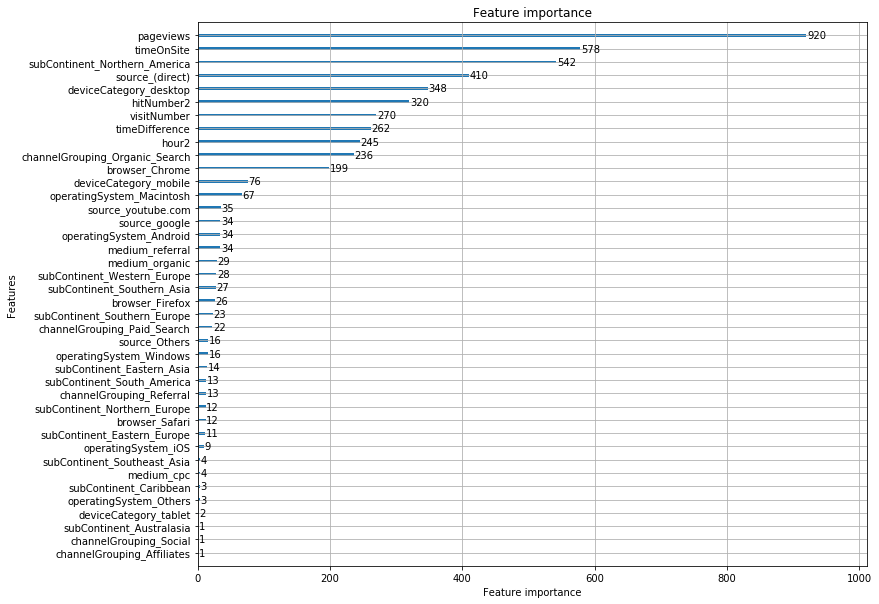

In [67]:
ax = lgb.plot_importance(model_clf)
fig = ax.figure
fig.set_size_inches(12,10)
plt.show()

**Train the Classfication Using most important features**

In [68]:

X_clf_2 = X_clf[['pageviews', 'hitNumber2', 'timeDifference', 'hour2', 
                 'subContinent_Northern America', 'timeOnSite','visitNumber',]]


X_clf_train2, X_clf_test2, y_clf_train2, y_clf_test2 = train_test_split(X_clf_2, y_clf, test_size=0.25, random_state=42)

lgtrain = lgb.Dataset(X_clf_train2, label=y_clf_train2)
lgval = lgb.Dataset(X_clf_test2, label=y_clf_test2)
model_clf2 = lgb.train(param_clf, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.251556
[200]	valid_0's binary_logloss: 0.153963
[300]	valid_0's binary_logloss: 0.122843
[400]	valid_0's binary_logloss: 0.111659
[500]	valid_0's binary_logloss: 0.106849
[600]	valid_0's binary_logloss: 0.104137
[700]	valid_0's binary_logloss: 0.102355
[800]	valid_0's binary_logloss: 0.101015
[900]	valid_0's binary_logloss: 0.0998819
[1000]	valid_0's binary_logloss: 0.0989108
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_logloss: 0.0989108


In [69]:
lgpred_clf2 = model_clf2.predict(X_clf_test2, num_iteration=model_clf2.best_iteration)
test_pred_clf = pd.DataFrame({"Transaction": np.expm1(lgpred_clf2), "y" : y_clf_test2})
test_pred_clf["Transaction"] = np.where(test_pred_clf["Transaction"]>0.035, 1, 0)
print(np.sqrt(metrics.accuracy_score(test_pred_clf["y"].values, 
                                        test_pred_clf["Transaction"].values)))

0.9671799421388958


**Regression Model Evaluation & Feature Selection**

In [0]:
lgpred_reg = model_reg.predict(X_reg_test, num_iteration=model_reg.best_iteration)

In [0]:
lgpred_reg[lgpred_reg < 0]=0

In [0]:
test_pred = pd.DataFrame({"totalTransactionRevenue": np.expm1(lgpred_reg), "y" : y_reg_test})

In [73]:
np.sqrt(metrics.mean_squared_error(np.log1p(test_pred["y"].values), 
                                         np.log1p(test_pred["totalTransactionRevenue"].values)))

15.025137911547752

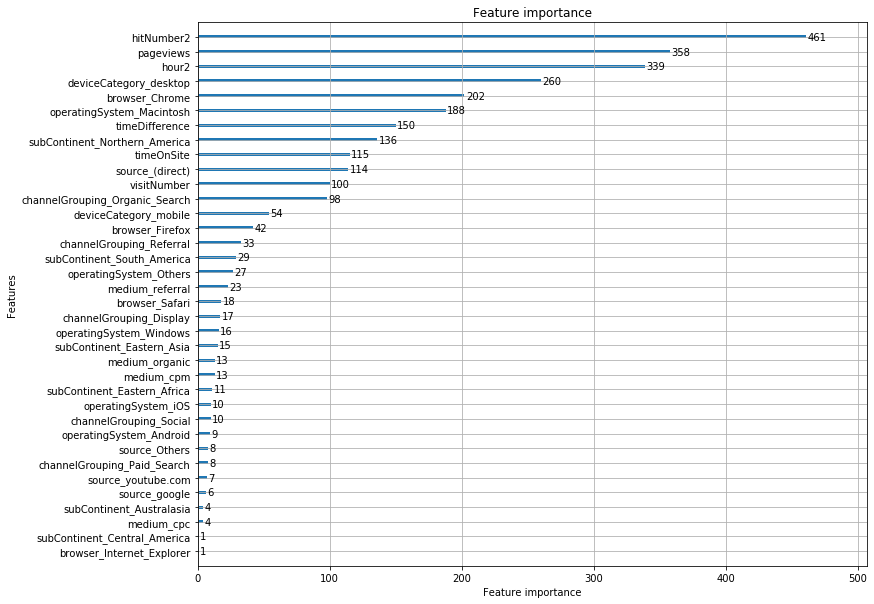

In [74]:
ax = lgb.plot_importance(model_reg)
fig = ax.figure
fig.set_size_inches(12,10)
plt.show()

**Train the Regression Model Using Most Important Features**

In [75]:
# y = np.log1p(train_df["totalTransactionRevenue"].values)
# X = train_df[[ 'hitNumber2', 'hour2', 'pageviews', 'timeOnSite',
#               'visitNumber', 'timeDifference']]
X_reg_2 = X_reg[['hitNumber2', 'hour2', 'pageviews', 'timeOnSite',
                'visitNumber', 'timeDifference']]

              # X = train_df[[ 'hitNumber2', 'pageviews', 'timeDifference','timeOnSite','hour2',
              # 'visitNumber','subContinent_Northern America','deviceCategory_desktop',
              # 'operatingSystem_Macintosh','browser_Chrome','channelGrouping_Organic Search',
              # 'source_google', 'transactions', 'medium_organic','operatingSystem_Windows']]


      #         'timeDifference', 'hitNumber2', 'hour2', 'visitNumber',
      #  'pageviews', 'timeOnSite', 'transactions', 
      #  'browser_Android Webview', 'browser_Chrome', 'browser_Edge',
      #  'browser_Firefox', 'browser_Internet Explorer', 'browser_Others',
      #  'browser_Safari', 'channelGrouping_Affiliates',
      #  'channelGrouping_Display', 'channelGrouping_Organic Search',
      #  'channelGrouping_Paid Search', 'channelGrouping_Referral',
      #  'channelGrouping_Social', 'deviceCategory_desktop',
      #  'deviceCategory_mobile', 'deviceCategory_tablet', 'medium_affiliate',
      #  'medium_cpc', 'medium_cpm', 'medium_organic', 'medium_referral',
      #  'operatingSystem_Android', 'operatingSystem_Macintosh',
      #  'operatingSystem_Others', 'operatingSystem_Windows',
      #  'operatingSystem_iOS', 'source_(direct)', 'source_Others',
      #  'source_google', 'source_youtube.com', 'subContinent_Australasia',
      #  'subContinent_Caribbean', 'subContinent_Central America',
      #  'subContinent_Central Asia', 'subContinent_Eastern Africa',
      #  'subContinent_Eastern Asia', 'subContinent_Eastern Europe',
      #  'subContinent_Melanesia', 'subContinent_Micronesian Region',
      #  'subContinent_Middle Africa', 'subContinent_Northern Africa',
      #  'subContinent_Northern America', 'subContinent_Northern Europe',
      #  'subContinent_Polynesia', 'subContinent_South America',
      #  'subContinent_Southeast Asia', 'subContinent_Southern Africa',
      #  'subContinent_Southern Asia', 'subContinent_Southern Europe',
      #  'subContinent_Western Africa', 'subContinent_Western Asia',
      #  'subContinent_Western Europe']]

# X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# X_train = X_train_full


X_reg_train2, X_reg_test2, y_reg_train2, y_reg_test2 = train_test_split(X_reg_2, y_reg, test_size=0.25, random_state=42)

lgtrain2 = lgb.Dataset(X_reg_train2, label=y_reg_train2)
lgval2 = lgb.Dataset(X_reg_test2, label=y_reg_test2)
model_reg2 = lgb.train(param_reg, lgtrain2, 1000, valid_sets=[lgval2], early_stopping_rounds=100, verbose_eval=100)


lgpred_reg = model_reg2.predict(X_reg_test2, num_iteration=model_reg2.best_iteration)
lgpred_reg[lgpred_reg < 0]=0

test_pred = pd.DataFrame({"totalTransactionRevenue": np.expm1(lgpred_reg), "y" : y_reg_test})

np.sqrt(metrics.mean_squared_error(np.log1p(test_pred["y"].values), 
                                         np.log1p(test_pred["totalTransactionRevenue"].values)))

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.02839
[200]	valid_0's rmse: 1.01097
[300]	valid_0's rmse: 1.00809
[400]	valid_0's rmse: 1.00844
Early stopping, best iteration is:
[322]	valid_0's rmse: 1.00804


15.032456775807765

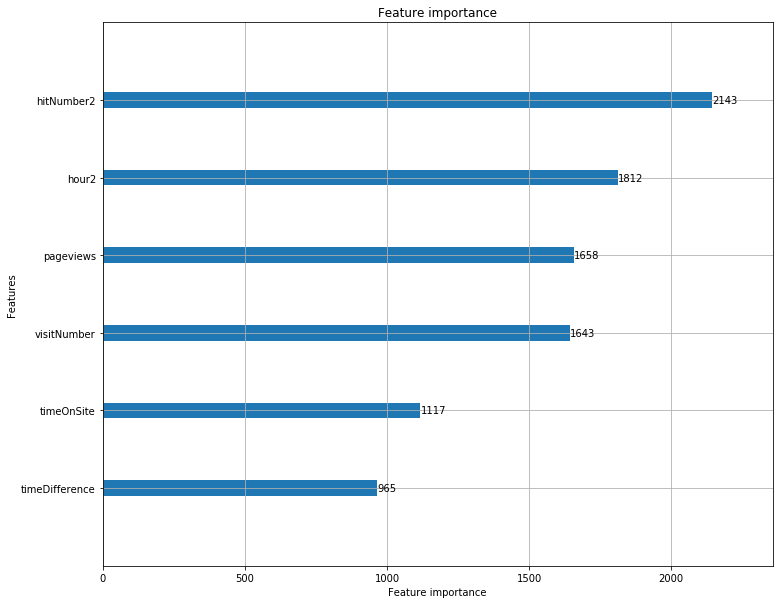

In [76]:
ax = lgb.plot_importance(model_reg2)
fig = ax.figure
fig.set_size_inches(12,10)
plt.show()

In [77]:
subfile

,fullVisitorId,PredictedLogRevenue
0,0000196310838896290,8.740692
1,0000268499301061358,2.173593
2,0000900085223565423,2.161468
3,000101445922736554,2.158543
4,0001180870711546826,2.161557
...,...,...
296718,9999898168621645223,2.157722
296719,999990167740728398,2.157749
296720,9999915620249883537,2.684577
296721,9999947552481876143,2.163679


In [78]:
subfile.shape

(296723, 2)

In [79]:
type(subfile['fullVisitorId'][0])

str

In [80]:
type(train_df['fullVisitorId'][0])

str

In [81]:
test_df.shape

(296723, 61)

In [82]:
test_df['fullVisitorId']

0         0000196310838896290
1         0000268499301061358
2         0000900085223565423
3          000101445922736554
4         0001180870711546826
                 ...         
296718    9999898168621645223
296719     999990167740728398
296720    9999915620249883537
296721    9999947552481876143
296722       9999970070697603
Name: fullVisitorId, Length: 296723, dtype: object

In [83]:
!gsutil cp gs://cleaned_dataset_msba/test_list.csv /tmp/test_list.csv

test_list = pd.read_csv("/tmp/test_list.csv", dtype={'fullVisitorId':'str'})

Copying gs://cleaned_dataset_msba/test_list.csv...
- [1 files][  9.8 MiB/  9.8 MiB]                                                
Operation completed over 1 objects/9.8 MiB.                                      


In [0]:
test_list = test_list[['fullVisitorId']]

In [85]:
test_list.shape

(296530, 1)

In [0]:
abc = pd.merge(test_list, subfile, how = 'left')

In [0]:
abc = abc.fillna(0)

In [88]:
abc

,fullVisitorId,PredictedLogRevenue
0,0000018966949534117,0.000000
1,0000039738481224681,0.000000
2,0000073585230191399,0.000000
3,0000087588448856385,0.000000
4,0000149787903119437,0.000000
...,...,...
296525,9999862054614696520,2.866095
296526,9999898168621645223,2.157722
296527,999990167740728398,2.157749
296528,9999915620249883537,2.684577


In [89]:
abc[abc['fullVisitorId']=="0000196310838896290"]

,fullVisitorId,PredictedLogRevenue
5,0000196310838896290,8.740692


In [90]:
abc.shape

(296530, 2)

In [91]:
abc

,fullVisitorId,PredictedLogRevenue
0,0000018966949534117,0.000000
1,0000039738481224681,0.000000
2,0000073585230191399,0.000000
3,0000087588448856385,0.000000
4,0000149787903119437,0.000000
...,...,...
296525,9999862054614696520,2.866095
296526,9999898168621645223,2.157722
296527,999990167740728398,2.157749
296528,9999915620249883537,2.684577


In [0]:
abc.to_csv('/tmp/test_res.csv', index= False)

In [93]:
train_df.shape

(1325849, 61)

In [94]:
train_df

,fullVisitorId,timeDifference,hitNumber2,hour2,visitNumber,pageviews,timeOnSite,transactions,totalTransactionRevenue,browser_Android Webview,browser_Chrome,browser_Edge,browser_Firefox,browser_Internet Explorer,browser_Others,browser_Safari,channelGrouping_Affiliates,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,deviceCategory_desktop,deviceCategory_mobile,deviceCategory_tablet,medium_affiliate,medium_cpc,medium_cpm,medium_organic,medium_referral,operatingSystem_Android,operatingSystem_Macintosh,operatingSystem_Others,operatingSystem_Windows,operatingSystem_iOS,source_(direct),source_Others,source_google,source_youtube.com,subContinent_Australasia,subContinent_Caribbean,subContinent_Central America,subContinent_Central Asia,subContinent_Eastern Africa,subContinent_Eastern Asia,subContinent_Eastern Europe,subContinent_Melanesia,subContinent_Micronesian Region,subContinent_Middle Africa,subContinent_Northern Africa,subContinent_Northern America,subContinent_Northern Europe,subContinent_Polynesia,subContinent_South America,subContinent_Southeast Asia,subContinent_Southern Africa,subContinent_Southern Asia,subContinent_Southern Europe,subContinent_Western Africa,subContinent_Western Asia,subContinent_Western Europe
0,0000053049821714864,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,1,0,1,0,0,0,0,0,0.0,1,0,1,0,0,0,0,0,0.0,0,0.0,1,0.0,1,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,1,0,0,0,0.0,0,0,0
1,0000085840370633780,60.0,2.0,18.0,1.0,2.0,13.0,0.0,0.0,0,0.0,0,0.0,0.0,0,1,0,0,1,0,0,0,1.0,0,0,0,0,0,1,0,0,1.0,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0.0,0,0,0,0,0,1.0,0,0,0,0,0,0,0.0,0,0,0
2,0000166374699289385,0.0,5.0,9.0,1.0,5.0,41.0,0.0,0.0,0,1.0,0,0.0,0.0,0,0,0,0,1,0,0,0,1.0,0,0,0,0,0,1,0,0,1.0,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0.0,0,0,0,0,0,1.0,0,0,0,0,0,0,0.0,0,0,0
3,0000197671390269035,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1,0.0,0,0.0,0.0,0,0,0,0,0,0,0,1,0.0,1,0,0,0,0,0,1,1,0.0,0,0.0,0,0.0,1,0,0,0,0,0,0,0,0.0,0,0,0,0,0,1.0,0,0,0,0,0,0,0.0,0,0,0
4,000020731284570628,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,1.0,0,0.0,0.0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0.0,0,1.0,0,1.0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325844,9999978264901065827,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,1.0,0,0.0,0.0,0,0,0,0,1,0,0,0,1.0,0,0,0,0,0,0,0,0,0.0,0,1.0,0,1.0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,1.0,0,0,0,0,0,0,0.0,0,0,0
1325845,9999985820452794361,210.0,5.5,14.0,1.5,5.5,190.0,0.0,0.0,0,2.0,0,0.0,0.0,0,0,0,0,1,1,0,0,2.0,0,0,0,1,0,1,0,0,0.0,0,2.0,0,0.0,0,2,0,0,0,0,0,0,0.0,0,0,0,0,0,2.0,0,0,0,0,0,0,0.0,0,0,0
1325846,9999986437109498564,60.0,2.0,16.0,1.0,2.0,55.0,0.0,0.0,0,1.0,0,0.0,0.0,0,0,0,0,1,0,0,0,0.0,1,0,0,0,0,1,0,1,0.0,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,1.0,0,0,0
1325847,99999951882718968,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,1.0,0,0.0,0.0,0,0,0,0,0,0,0,1,1.0,0,0,0,0,0,0,1,0,0.0,0,1.0,0,0.0,0,0,1,0,0,1,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0,0,0
